In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib
# matplotlib.rcParams["figure.figsize"]=(8,4)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [73]:
df1=pd.read_csv("p1_Data.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
df1.shape

(150, 5)

In [61]:
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Figure size 1000x600 with 0 Axes>

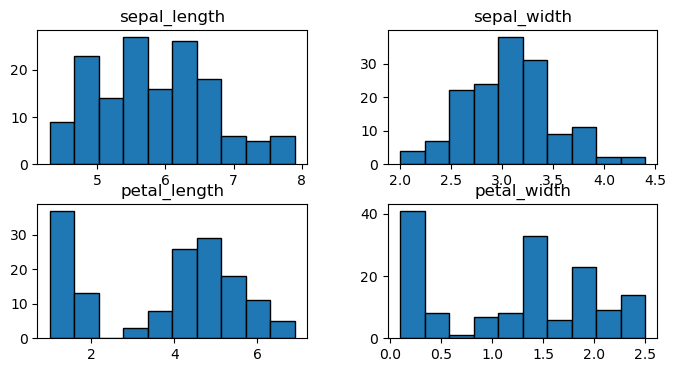

<Figure size 1000x600 with 0 Axes>

In [107]:
df1.hist(bins=10,edgecolor='black',grid=False)
plt.figure(figsize=(10, 6))

In [23]:
df1['species'] = LabelEncoder().fit_transform(df1['species'])

In [25]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df1['species'].unique()

array([0, 1, 2])

In [31]:
correlation_matrix = df1.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


<Figure size 1000x1000 with 0 Axes>

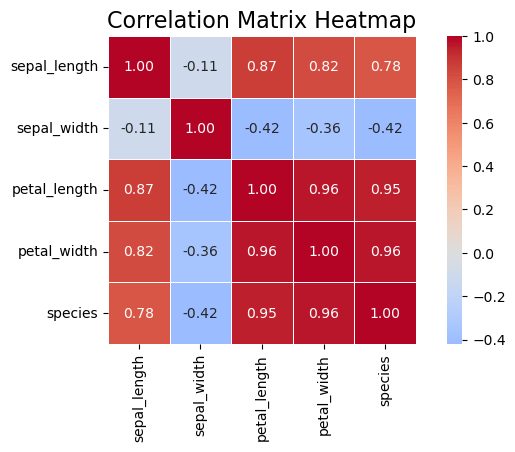

<Figure size 1000x1000 with 0 Axes>

In [113]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.figure(figsize=(10, 10))

In [59]:
#split the features and target set 
X=df1.drop(columns='species',axis=0)
Y=df1['species']
X.shape

(150, 4)

In [81]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,train_size=0.9,shuffle=False)
print("Training Feature Shape: ",X_train.shape)
print("Training Target Shape: ",Y_train.shape)
print("Testing Feature Shape: ",X_test.shape)
print("Testing Target Shape: ",Y_test.shape)

Training Feature Shape:  (135, 4)
Training Target Shape:  (135,)
Testing Feature Shape:  (15, 4)
Testing Target Shape:  (15,)


In [ ]:
def linear_regression(X_train,Y_train,X_test,Y_test,learning_rate):
    model=LinearRegression()
    modle.fit(X_train,Y_train)

Learning rate: 0.001
RMSE: 0.3789861850076458
Coefficients: [-0.01846467 -0.13231445  0.33889498  0.17399391]
Intercept: [-0.02767817]

Learning rate: 0.01
RMSE: 0.34394965225982854
Coefficients: [-0.09249749 -0.04001777  0.32291852  0.32362824]
Intercept: [-0.01895445]

Learning rate: 0.1
RMSE: 3600739202965.099
Coefficients: [-3.63657223e+11  4.45840491e+11 -2.63921206e+11 -4.91669687e+11]
Intercept: [-1.09526733e+11]



<Figure size 600x400 with 0 Axes>

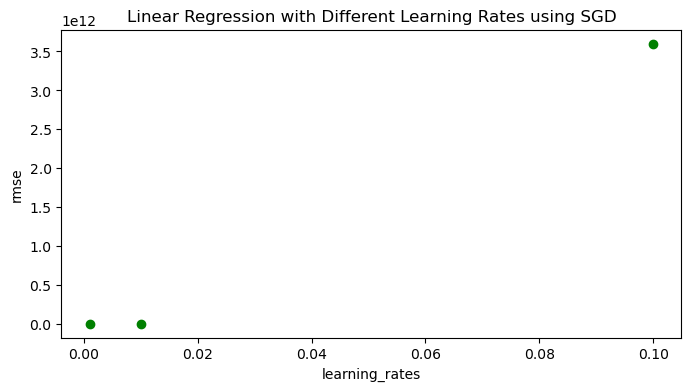

<Figure size 600x400 with 0 Axes>

In [127]:
learning_rates = [0.001, 0.01, 0.1]

rmse_list = []
model_coef_list=[]
model_intercept_list=[]

for lr in learning_rates:
    model = SGDRegressor(learning_rate='constant', eta0=lr,random_state=1)
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
    rmse_list.append(rmse)
    model_coef = model.coef_
    model_coef_list.append(model_coef)
    model_intercept=model.intercept_
    model_intercept_list.append(model_intercept)

    print(f"Learning rate: {lr}")
    print(f"RMSE: {rmse}")
    print(f"Coefficients: {model_coef}")
    print(f"Intercept: {model_intercept}")
    print()

plt.scatter(learning_rates,rmse_list,c='g')
plt.title('Linear Regression with Different Learning Rates using SGD')
plt.xlabel('learning_rates')
plt.ylabel('rmse')
plt.figure(figsize=(6,4))


In [131]:
print("For The Optimal ONE")
index = 1
print(f"Learning rate: {learning_rates[index]}")
print(f"Model RMSE: {rmse_list[index]}")
print(f"Model Coefficients: {model_coef_list[index]}")
print(f"Model Intercept: {model_intercept_list[index]}")

For The Optimal ONE
Learning rate: 0.01
Model RMSE: 0.34394965225982854
Model Coefficients: [-0.09249749 -0.04001777  0.32291852  0.32362824]
Model Intercept: [-0.01895445]


In [135]:
from sklearn.cluster import KMeans

In [145]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmeans.fit(X_train)

Y_clus_pred = kmeans.predict(X_test)
print("Predction")
print(Y_clus_pred)

Predction
[0 0 0 2 0 0 0 2 0 0 0 2 0 0 2]


C:\Users\rajbh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
## END OF THE TASK 1